<font color = blue size = 2 >
    
# Desafío 1: Determinantes del ingreso
</font>

Modelo predictivo sobre la probabilidad que un individuo presente salarios por sobre o bajo los 50.000 dólares anuales, en base a una serie de atributos sociodemográficos.


<a id='contenidos' />

### INDICE

- 1. [Preliminares](#preliminares)
    - 1.1 [Problema](#PROBLEMA)
    - 1.2 [Objetivo](#OBJETIVO)
    - 1.3 [Solución al problema](#OBJETIVO)
    - 1.4 [Métricas de desempeño](#OBJETIVO)
        * 1.4.1 [Evaluación de resultados](#dfa)
            * 1.4.1.1 [Matriz de confusión](#dfa)
            * 1.4.1.2 [Exactitud](#dfa)
            * 1.4.1.3 [Precisión](#dfa)
            * 1.4.1.4 [Recall](#dfa)
            * 1.4.1.5 [F1](#dfa)
            * 1.4.1.6 [Curva ROC](#dfa)     
            
- 2. [Aspectos computacionales](#aspectos) 
    - 2.1 [Librería utilizadas](#librerías)
    - 2.2 [Preprocesamiento y recodificación de datos](#recod)
        - 2.2.1 [Estandarización del nombre de las columnas](#estandarizacion)
        - 2.2.2 [Recodificación de variables](#recodificación)
- 3. [Descripción](#descripción)
    - 3.1 [Medidad descriptivas](#)
    - 3.2 [Gráfico de variables](#)
    - 3.3 [Datos perdidos](#)
    - 3.4 [Correlacion](#)

- 4. [Modelación descriptiva](#MD)  
- 5. [Modelación predictiva](#MP)  
- 6. [Variables contenidas en la base de datos](#base)            

<a id='preliminares'>
 
## 1. Preliminares

[(back to top)](#contenidos)

Descripción del problema, objetivos, solución (criterio de optimización y metricas de desempeño).

##### A. PROBLEMA:
</div> Un organismo no gubernamental está interesado en las dinámicas socioeconómicas que determinan la desigualdad de ingreso y la erradicación de la pobreza extrema.

##### B. OBJETIVO:
</div> Desarrollo de un modelo predictivo sobre la probabilidad que un individuo presente salarios por sobre o bajo los 50.000 dólares anuales, en base a una serie de atributos sociodemográficos.

##### C. SOLUCION:
</div> Al ser un problema de clasificación se realiza un modelo de regresión logística.
$$y_i = log \left( \frac{Pr(y)}{1 - Pr(y)} \right) = \beta_0 + \sum_{i=1}^n \beta_i x_i + \epsilon_i$$

Se realizará en una primera instancia un modelo desde la econometría y luego se constratará con los modelos desde el machine learning.

Problema de optimización: método de **máxima verosimilitud**

##### D. METRICAS DE DESEMPEÑO:

###### Bondad de Ajuste
</font>  

</div>  Como métricas que informan sobre la capacidad explicativa y de desempeño general del modelo consideraremos:

**1. Log-Likelihood:** La verosimilitud del modelo ajustado. 

**2. LL-Null:** La verosimilitud del modelo sin regresores.

<font color = gray size = 3 >  
###### Influencia de cada una de las variables independientes
</font>  
 
**1. Coeficiente beta (β):** representa el logaritmo de la chance de ocurrencia de un evento en específico. Se transforman de log-odds a probabilidad y simbolizan la probabilidad de ocurrencia del suceso. La diferencia entre chance de ocurrencia y probabilidad es que la chance de ocurrencia nos dice qué tanto del espacio de eventos posibles está siendo utilizado por el evento de interés, mientras que la probabilidad nos dice qué tan "seguros" podemos estar el resultado final.
- Chance de ocurrencia:

$$Odd(x) = \frac{Pr(x)}{1 - Pr(x)}$$

- Probabilidad:

$$p(x) = \frac{Número\ de\ ocurrencia\ de\ x}{Casos\ totales\ medidos}$$

El objetivo es traducir los valores del log odds en una declaración de probabilidad entre 0 y 1

$$ logit^{-1} (x)= \frac{e^x}{(1 + e^{-x})}$$
   


<font color = gray size = 3 >  
###### Evaluación de resultados
</font>  

**A. Matriz de confusión:** permite observar las categorías predichas con las observadas. La diagonal principal reporta los casos exitosamente predichos.
 
$$\frac{VP\hspace{1cm} |\hspace{1cm} FP}{FN\hspace{1cm} |\hspace{1cm} VN}$$

- VP: Verdadero Positivo 
- FP: Falso Positivo
- FN: Verdadero Negativo
- VN: Verdadero Negativo

**B. Exactitud:** mide los casos correctamente predichos del total de observaciones. La medida de exactitud por sí sola es engañosa, dado que no hace distinción alguna frente a los tipos de errores (Falso Negativo y Falso Positivo). Para evaluar su desempeño necesitamos encontrar un benchmark (punto de referencia) que refleje capacidad de predicción al azar, sin la necesidad de un modelo.

$$ Exactitud = \frac{VP + VN}{VP+VN+FP+FN} $$

**C. Precisión:** mide la fracción de predicciones correctas entre las etiquetas positivas. Valores altos significan que el algoritmo predice más resultados relevantes que irrelevantes. Responde a la pregunta: ¿Qué proporción de indentificaciones positivas fue correcta?.

$$ Precisión = \frac{VP}{VP+FP} $$

**D. Recall (o sensibilidad):** mide la fraccion de verdaderos positivos predichos por el modelo. Valores altos significan que el algoritmo logra predecir la mayoría de los resultados relevantes. Responde a la pregunta: ¿Qué proporción de positivos reales se identificó correctamente?.

$$ Recall = \frac{VP}{VP+FN} $$

**E. F1:** representa la media armónica entre Precision y Recall. Se prefiere la media armónica dado que penaliza de mayor manera los valores bajos.

**F. Curva ROC (Receiving Operating Characteristics):**  evalúa la relación entre ambos errores condicional en todo el rango del clasificador.A primera vista un modelo con una capacidad predictiva adecuada debe tener una curva por sobre la bisectriz, la cual indica la tasa de clasificación aleatoria. Un modelo con desempeño deficiente presentará curvas ROC bajo la bisectriz.
Una curva ROC con capacidad predictiva adecuada siempre se posicionará por sobre la bisectriz, dado que la tasa de verdaderos positivos será mayor que la tasa de falsos positivos. El comportamiento deseado de la curva ROC es que tienda a acercarse a la esquina superior izquierda del gráfico, señalada con verde.
La calidad de una curva ROC también se puede resumir con una métrica simple llamada la área debajo de la curva. Valores mayores de ésta cifra van a estar asociados con un mejor desempeño del modelo en predecir más verdaderos positivos que falsos positivos.

<a id='aspectos'>
 
##  2. Aspectos computacionales

[(back to top)](#contenidos)
 

Librerías, módulos a implementar, funciones generadas y su objetivo


- Se debe considerar el uso de las librerías asociadas para la ingesta, preprocesamiento, visualización y modelación, así como métricas de evaluación. 
- Se debe detallar y considerar el proceso de preprocesamiento y recodificación de datos. 

<font color = gray size = 3 >  
###### 2.1   Librerías utilizadas
</font>  

In [1]:
#!pip install unidecode

# Preprocesamiento
import pandas as pd
import numpy as np
import unidecode
from sklearn.preprocessing import StandardScaler

# Visualización 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

plt.style.use('seaborn')
warnings.filterwarnings("ignore")


# Modelación
from funciones_auxiliares import *
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression


# Métricas de evaluación
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

<font color = gray size = 3 >  
###### 2.2   Preprocesamiento y Recodificación de datos
</font>  

Comenzamos importando la base de datos. Vale aclarar que debemos tener en cuenta que los valores perdidos o no registrados en este caso, aparecen con un signo de interrogación, por lo que debemos agregar "na_values" a la hora de importar el csv.

In [2]:
df_full = pd.read_csv('income-db.csv', na_values ='?')
df= df_full
df.tail(2)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [3]:
print(f"El DataFrame contiene {df.shape[0]} filas por {df.shape[1]} columnas.")

El DataFrame contiene 48842 filas por 15 columnas.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


<font color = gray size = 3 >  
###### 2.2.1 Estandarización del nombre de las columnas
</font>  

In [5]:
df.columns = process_cols(df.columns)
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational_num',
       'marital_status', 'occupation', 'relationship', 'race', 'gender',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

Si observamos, vemos que hay 3 variables numéricas que se registraron como strings, cuya interpretación en pandas devuelve una estructura de datos genérica. Por ello debemos transformar dichos valores:

<font color = gray size = 3 >  
###### 2.2.2 Recodificación de variables
</font>  
Siguiendo la sugerencia de la organización, vamos a recodificar algunas variables según lo indicado.

La variable **"occupation"** debe recodificarse como **"collars"** siguiendo una nomenclatura similar a:
- white-collar $\leftarrow$ Prof-specialty, Exec-managerial, Adm-clerical, Sales, T ech-support.
- blue-collar $\leftarrow$ Craft-repair, Machine-op-inspct, Transport-moving, Handlers-cleaners, Farming-fishing, Protective-serv, Priv-house-serv.
- others $\leftarrow$ Other-service, Armed-Forces.

La variable **"workclass"** debe recodificarse como **"workclass_recod"** siguiendo una nomenclatura similar a:
- federal-gov $\leftarrow$ Federal-gov.
- state-level-gov $\leftarrow$ State-gov, Local-gov.
- self-employed $\leftarrow$ Self-emp-inc, Self-emp-not-inc.
- unemployed $\leftarrow$ Never-worked, Without-pay.


La variable **"education"** debe recodificarse como **"educ_recod"** siguiendo una nomenclatura similar a:
- preschool $\leftarrow$ Preschool.
- elementary-school $\leftarrow$ 1st-4th, 5th-6th.
- high-school $\leftarrow$ 7th-8th, 9th, 10th,11th, 12th, HS-grad.
- college $\leftarrow$ Assoc-voc, Assoc-acdm, Some-college.
- university $\leftarrow$ Bachelors, Masters, Prof-school, Doctorate.

La variable **"marital-status"** debe recodificarse como **"civstatus"** siguiendo una nomenclatura similar a:
- married $\leftarrow$ Married-civ-spouse, Married-spouse-absent, Married-AFspouse.
- divorced $\leftarrow$ Divorced.
- separated $\leftarrow$ Separated.
- widowed $\leftarrow$ Widowed.

La variable **"native-country"** debe recodificarse como **"region"** donde cada país debe asignarse a uno de 
los 5 continentes:
- america $\leftarrow$ 
                       United-States, Canada,Outlying-US(Guam-USVI-etc)
                       Peru, South, Columbia, Ecuador, Trinadad&Tobago
                       Mexico, Dominican-Republic, El-Salvador, Puerto-Rico, Haiti, Guatemala, Cuba, Honduras,
                       Jamaica, Nicaragua
- europa $\leftarrow$ 
                      Ireland, Germany, Poland, Italy, Portugal, Scotland, Yugoslavia, Hungary, Greece, France, 
                      Holand-Netherlands, England
- asia $\leftarrow$
                      Philippines, Thailand, Vietnam, Japan, India , Cambodia , Laos, Taiwan, China, Iran, Hong
- africa $\leftarrow$ 
- oceanía $\leftarrow$ 



In [6]:
# OCUPACIÓN DEL INDIVIDUO
df = recodificacion(df,'occupation','collars',
                    ['Prof-specialty','Exec-managerial','Adm-clerical','Sales','Tech-support',
                     'Craft-repair','Machine-op-inspct','Transport-moving','Handlers-cleaners','Farming-fishing',
                     'Protective-serv','Priv-house-serv',
                     'Other-service', 'Armed-Forces'],
                    ['white-collar','white-collar','white-collar','white-collar','white-collar',
                    'blue-collar','blue-collar','blue-collar','blue-collar','blue-collar',
                     'blue-collar','blue-collar',
                    'other','other'])

# NATURALEZA DE LA ORGANIZACIÓN EMPLEADORA
df = recodificacion(df,'workclass','workclass_recod',
                    ['Federal-gov',
                     'State-gov','Local-gov',
                     'Self-emp-inc','Self-emp-not-inc',
                     'Never-worked','Without-pay'],
                    ['federal-gov',
                     'state-level-gov','state-level-gov',
                     'self-employed','self-employed',
                     'unemployed','unemployed'])

# NIVEL EDUCATIVO DEL INDIVIDUO
df = recodificacion(df,'education','educ_recod',
                    ['Preschool',
                     '1st-4th','5th-6th',
                     '7th-8th', '9th', '10th','11th','12th', 'HS-grad',
                     'Assoc-voc', 'Assoc-acdm', 'Some-college',
                     'Bachelors', 'Masters', 'Prof-school', 'Doctorate'],
                    ['preschool',
                     'elementary-school','elementary-school',
                     'high-school','high-school','high-school','high-school','high-school','high-school',
                     'college','college','college',
                     'university','university','university','university'])
# ESTADO CIVIL
df = recodificacion(df,'marital_status','civstatus',
                    ['Married-civ-spouse', 'Married-spouse-absent', 'Married-AFspouse',
                     'Divorced',
                     'Separated',
                     'Widowed'],
                    ['married','married','married',
                     'divorced',
                     'separated',
                     'widowed'])
# CONTINENTE
df = recodificacion(df,'native_country','region',
                    # América
                    ['United-States','Canada','Outlying-US(Guam-USVI-etc)','Mexico','Dominican-Republic',
                     'El-Salvador','Puerto-Rico','Haiti','Guatemala','Cuba','Honduras','Jamaica','Nicaragua',
                    'Peru','South','Columbia','Ecuador','Trinadad&Tobago',
                     # Europa
                    'Ireland','Germany','Poland','Italy','Portugal','Scotland','Yugoslavia','Hungary','Greece',
                    'France','Holand-Netherlands','England',
                     # Asia
                    'Philippines','Thailand', 'Vietnam','Japan','India','Cambodia','Laos','Taiwan','China','Iran','Hong'],
                    ['america','america','america','america','america',
                     'america','america','america','america','america','america','america','america',
                     'america','america','america','america','america',
                     'europa','europa','europa','europa','europa','europa','europa','europa','europa',
                     'europa','europa','europa',
                     'asia','asia','asia','asia','asia','asia','asia','asia','asia','asia','asia'])

Los valores que asume la variable occupation/collars originalmente son: 

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64
                                 
La variable transformada occupation/collars asume los nuevos valores de: 

white-collar    24819
blue-collar     16276
other            4938
Name: collars, dtype: int64
----------------------------------------------------------------------------------- 
Los valores que asume la variable workclass/workclass_recod originalmente son: 

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Withou

La variable **"income"** debe recodificarse de forma binaria.
- Los valores menores o iguales a 50 pasan a tener un valor de cero.

Además vamos a recodificar la variable **"gender"** de forma binaria 
- Considerando como cero los Male.

In [7]:
df = recodificacion_binaria(df,['income','gender'])

Los valores que asume la variable income originalmente son: 

<=50K    37155
>50K     11687
Name: income, dtype: int64
                                 
La variable transformada income asume los nuevos valores de: 

0    37155
1    11687
Name: income, dtype: int64
----------------------------------------------------------------------------------- 
Los valores que asume la variable gender originalmente son: 

Male      32650
Female    16192
Name: gender, dtype: int64
                                 
La variable transformada gender asume los nuevos valores de: 

0    32650
1    16192
Name: gender, dtype: int64
----------------------------------------------------------------------------------- 


<a id='descripción'>
 
##  3. Descripción

[(back to top)](#contenidos)
    
Inspección visual:
- Del vector objetivo. 
- De las variables. 
- De datos perdidos en las variables. 
De ser necesario, se puede iterar en el proceso de preprocesamiento y recodificación de las variables.

<font color = gray size = 3 >  
###### 3.1 Medidas descriptivas de los datos 
</font>  

Ahora vamos a solicitar las medidas descriptivas de los datos con los que vamos a trabajar:

In [8]:
medidas_descriptivas(df)

                                 VARIABLES CUANTITATIVAS 
                        


,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.64,13.71,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.13,105604.03,12285.0,117550.5,178144.5,237642.0,1490400.0
educational_num,48842.0,10.08,2.57,1.0,9.0,10.0,12.0,16.0
gender,48842.0,0.33,0.47,0.0,0.0,0.0,1.0,1.0
capital_gain,48842.0,1079.07,7452.02,0.0,0.0,0.0,0.0,99999.0
capital_loss,48842.0,87.50,403.00,0.0,0.0,0.0,0.0,4356.0
hours_per_week,48842.0,40.42,12.39,1.0,40.0,40.0,45.0,99.0
income,48842.0,0.24,0.43,0.0,0.0,0.0,0.0,1.0


                                 VARIABLES CUALITATIVAS 
                        
WORKCLASS_RECOD
----------
Private            33906
self-employed       5557
state-level-gov     5117
federal-gov         1432
unemployed            31
Name: workclass_recod, dtype: int64 

----------
EDUC_RECOD
----------
high-school          21353
college              14540
university           12110
elementary-school      756
preschool               83
Name: educ_recod, dtype: int64 

----------
CIVSTATUS
----------
married              23007
Never-married        16117
divorced              6633
separated             1530
widowed               1518
Married-AF-spouse       37
Name: civstatus, dtype: int64 

----------
COLLARS
----------
white-collar    24819
blue-collar     16276
other            4938
Name: collars, dtype: int64 

----------
RELATIONSHIP
----------
Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1

<font color = gray size = 3 >  
###### 3.2 Gráfico de las variables 
</font>  

Para tener una mejor perspectiva del comportamiento de las columnas vamos a graficarlas según el tipo de datos que contenga cada variable.

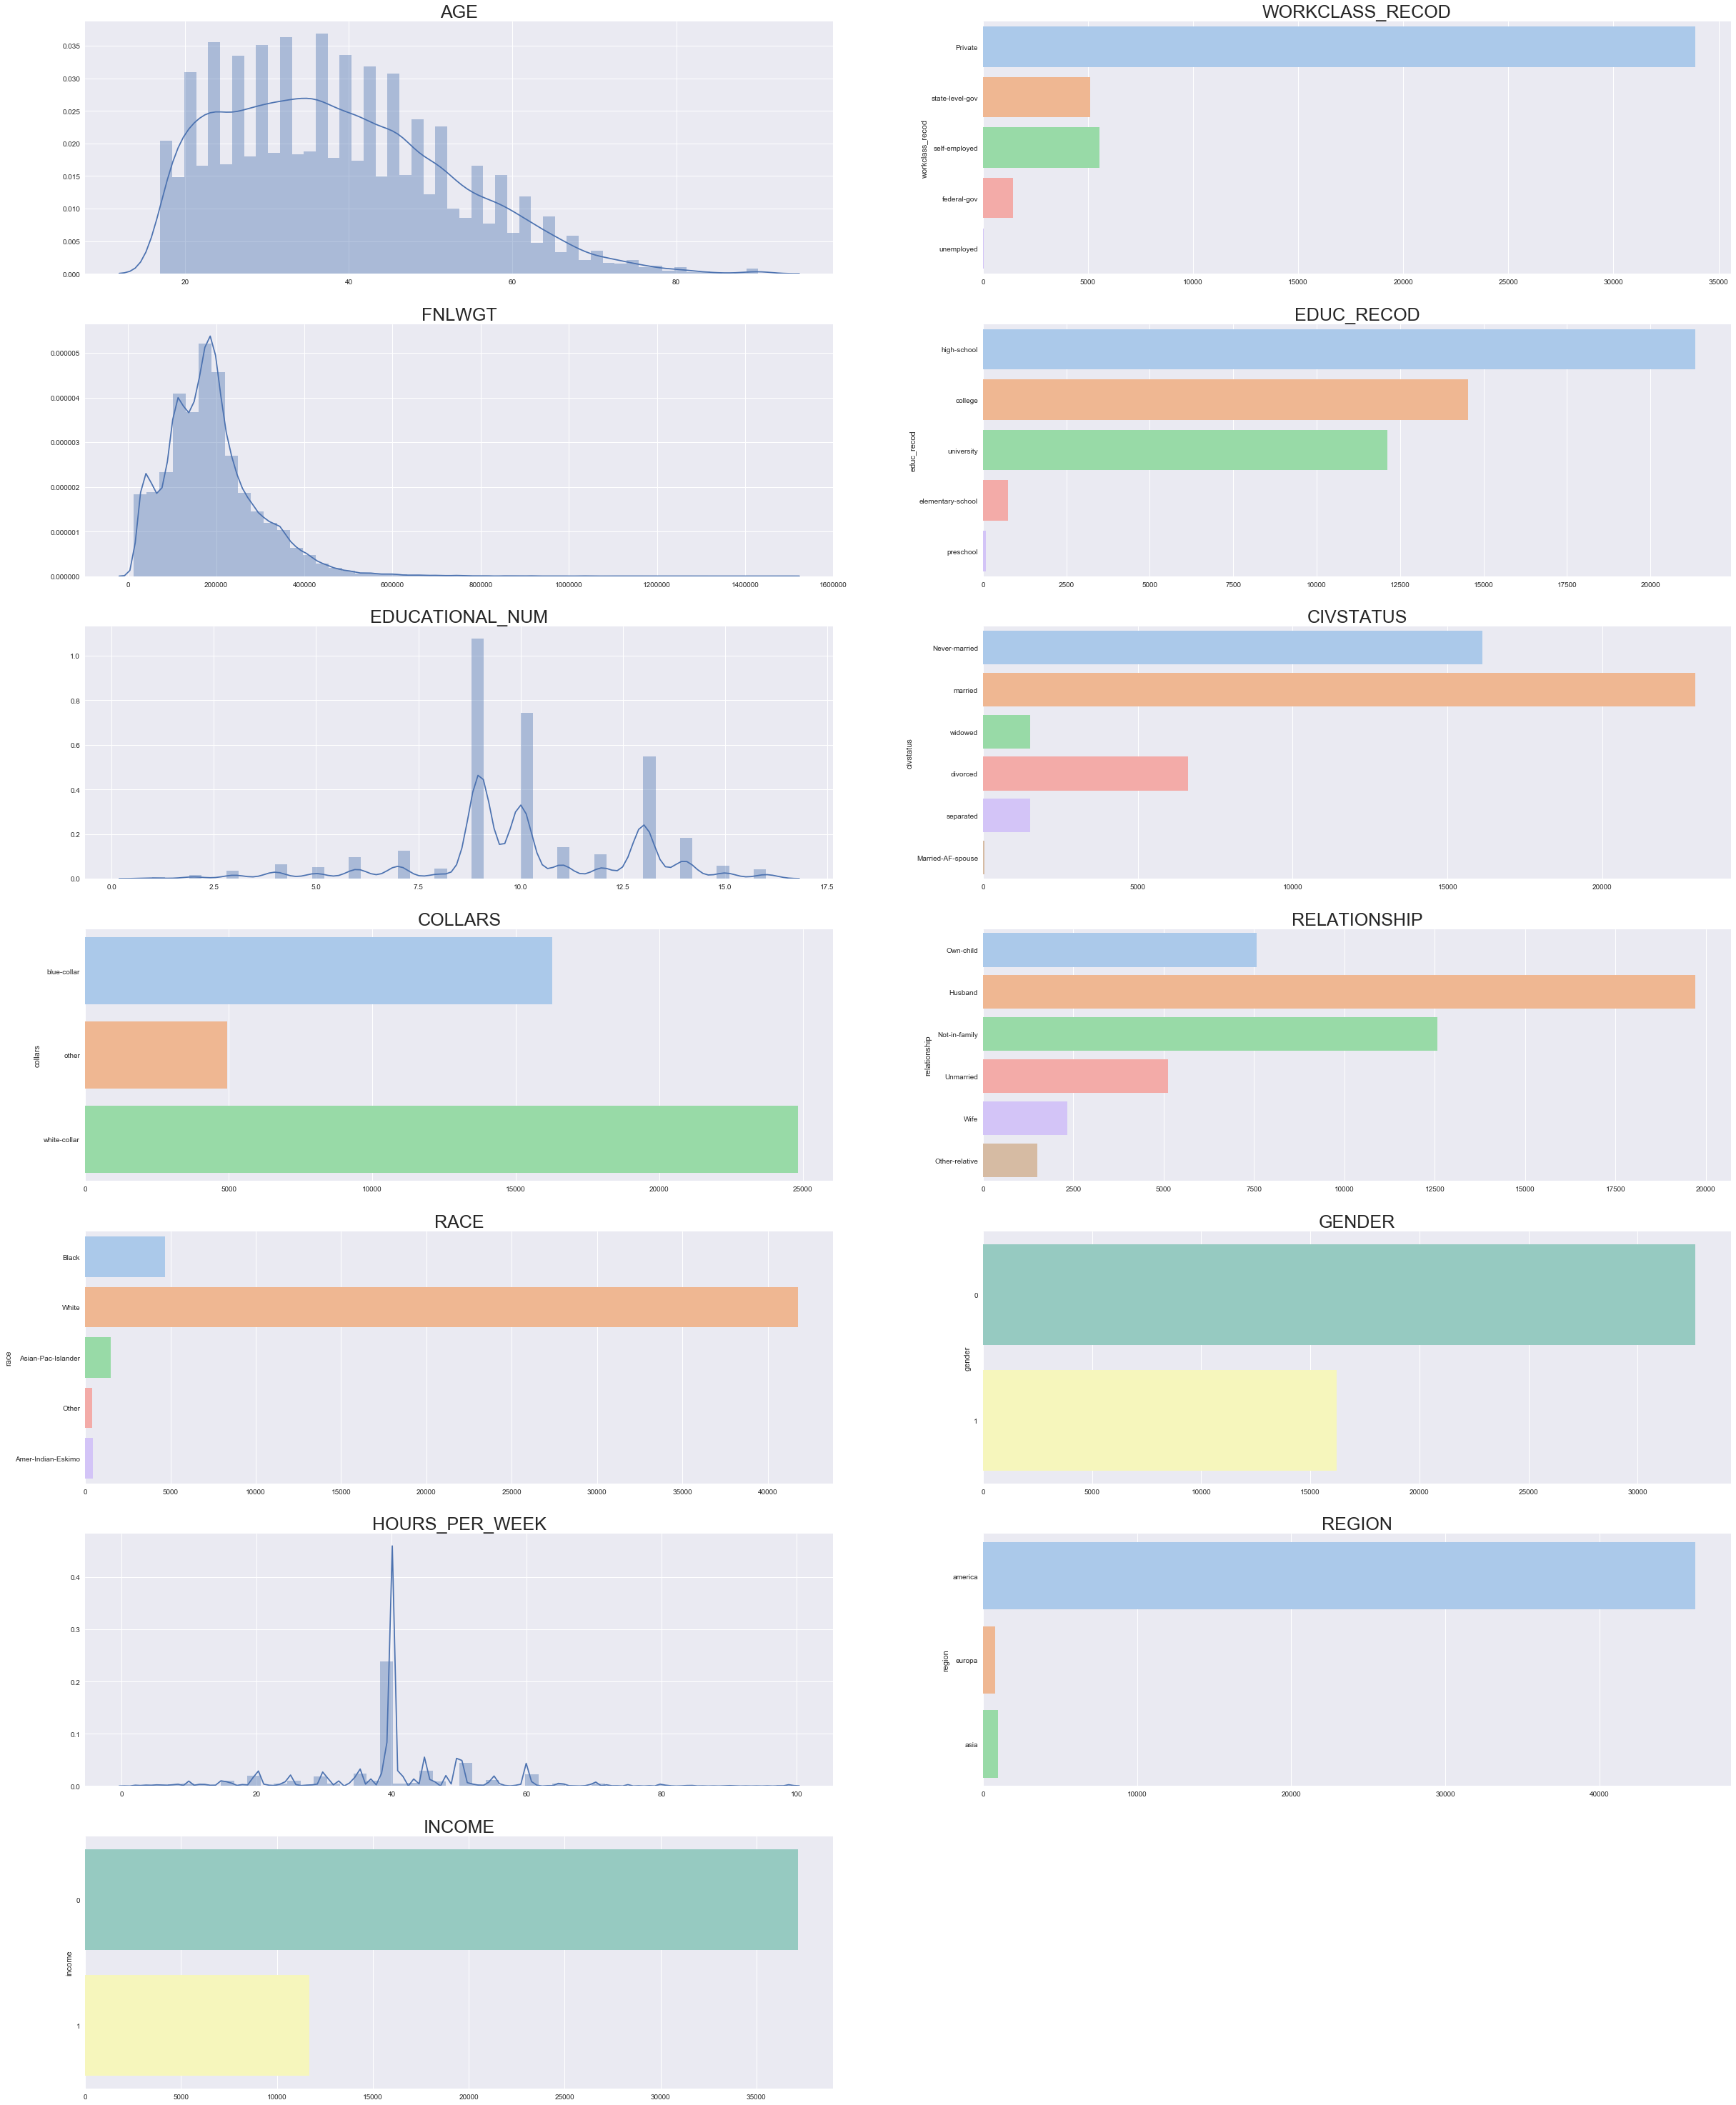

In [9]:
grafico_vbles(df.drop(columns = ['capital_gain','capital_loss']))

<font color = gray size = 3 >  
###### 3.3 Datos perdidos 
</font>  

,Total,Porcentaje,Tipo de Dato
collars,2809,5.75,object
workclass_recod,2799,5.73,object
region,857,1.75,object


MATRIZ DE VALORES PERDIDOS


<Figure size 288x288 with 0 Axes>

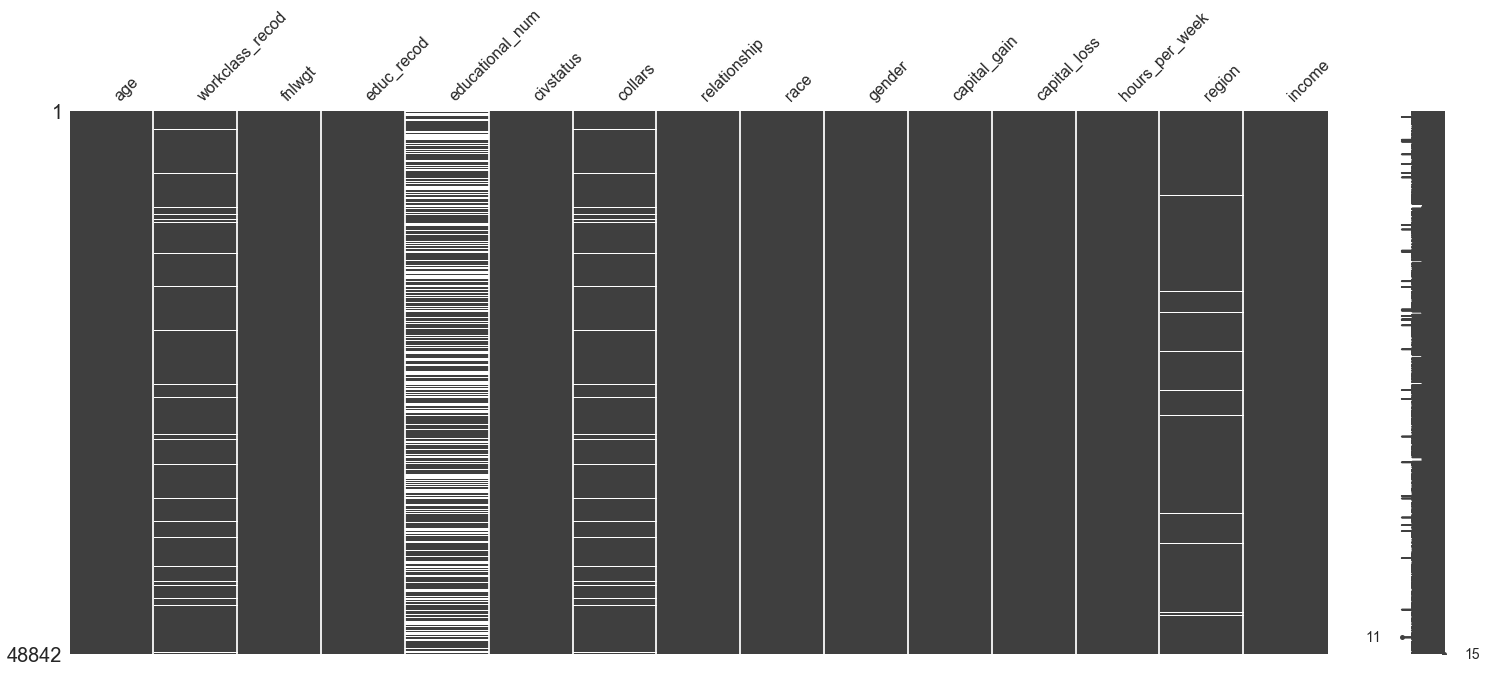

CANTIDAD DE DATOS PERDIDOS POR VARIABLE


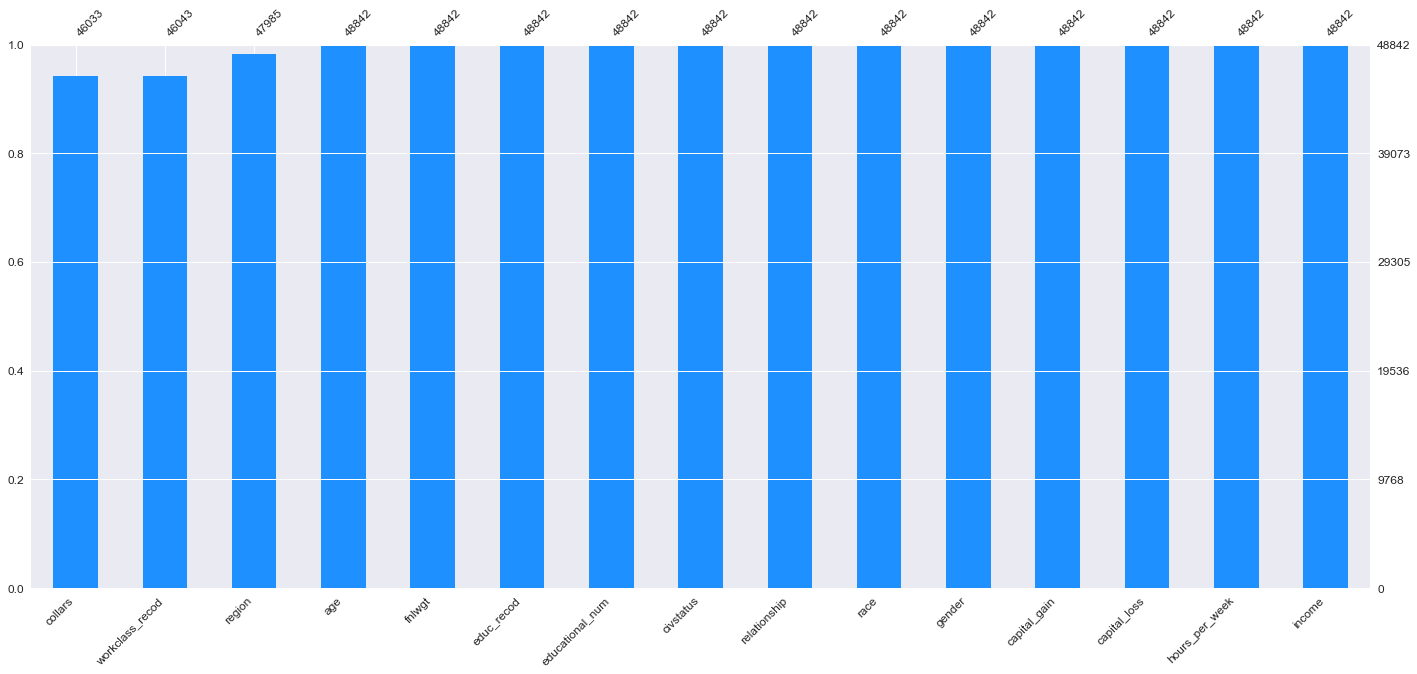

GRADO DE ASOCIACION ENTRE DATOS PERDIDOS POR VARIABLES


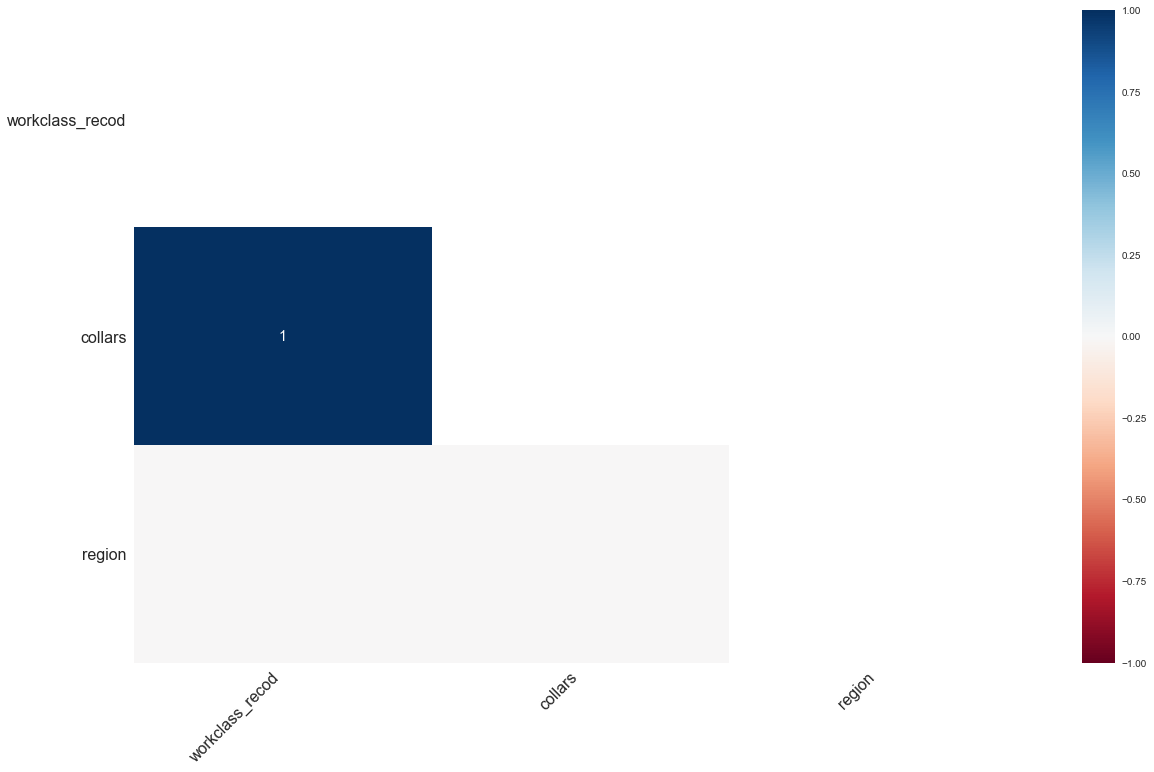



Sí eliminamos los datos faltantes perdemos el 7.41% de la muestra


In [10]:
datos_faltantes(df)

In [11]:
df.shape

(48842, 15)

In [12]:
df[df["collars"].isna()].transpose()

,4,6,13,22,35,75,89,100,113,132,...,48707,48758,48771,48775,48806,48811,48812,48820,48822,48823
age,18,29,58,72,65,17,41,51,20,20,...,20,49,60,82,81,35,30,71,41,72
workclass_recod,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,103497,227026,299831,132015,191846,165361,38434,189762,30796,334105,...,203992,114648,134152,403910,120478,320084,33811,287372,202822,129912
educ_recod,college,high-school,high-school,high-school,high-school,high-school,university,college,high-school,high-school,...,high-school,high-school,high-school,high-school,college,university,university,university,high-school,high-school
educational_num,10,9,9,4,9,6,14,10,9,9,...,9,8,5,9,11,13,13,16,9,9
civstatus,Never-married,Never-married,married,divorced,married,Never-married,married,married,Never-married,Never-married,...,Never-married,divorced,divorced,Never-married,divorced,married,Never-married,married,separated,married
collars,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship,Own-child,Unmarried,Husband,Not-in-family,Husband,Own-child,Wife,Wife,Own-child,Not-in-family,...,Own-child,Other-relative,Not-in-family,Not-in-family,Unmarried,Wife,Not-in-family,Husband,Not-in-family,Husband
race,White,Black,White,White,White,White,White,White,White,White,...,White,Black,Black,White,White,White,Asian-Pac-Islander,White,Black,White
gender,1,0,0,1,0,0,1,1,1,1,...,0,0,0,0,1,1,1,0,1,0


In [13]:
df = df.dropna()

<font color = gray size = 3 >  
###### 3.4 Correlación 
</font>  

Visualizemos las correlaciones mediante una matriz.

                                   CORRELACION ENTRE INCOME Y LAS VARIABLES 
                        
age                0.24
fnlwgt            -0.01
educational_num    0.33
gender            -0.22
capital_gain       0.22
capital_loss       0.15
hours_per_week     0.23
income             1.00
Name: income, dtype: float64

                                 CONSIDERANDO ÚNICAMENTE LAS CORRELACIONES MAYORES A 0.4

income    1.0
Name: income, dtype: float64


                                FUERZA DE ASOCIACIÓN ENTRE LAS VARIABLES MAYOR A 0.4                         



,age,fnlwgt,educational_num,gender,capital_gain,capital_loss,hours_per_week,income
age,1,,,,,,,
fnlwgt,,1,,,,,,
educational_num,,,1,,,,,
gender,,,,1,,,,
capital_gain,,,,,1,,,
capital_loss,,,,,,1,,
hours_per_week,,,,,,,1,
income,,,,,,,,1


Excluir del análisis la que explique menos el comportamiento de la variable a predecir. Debido a que, de los contrario, podría existir un fuerte problema de autocorrelacion en la predicción.


                                             GRÁFICO DE CALOR                                        


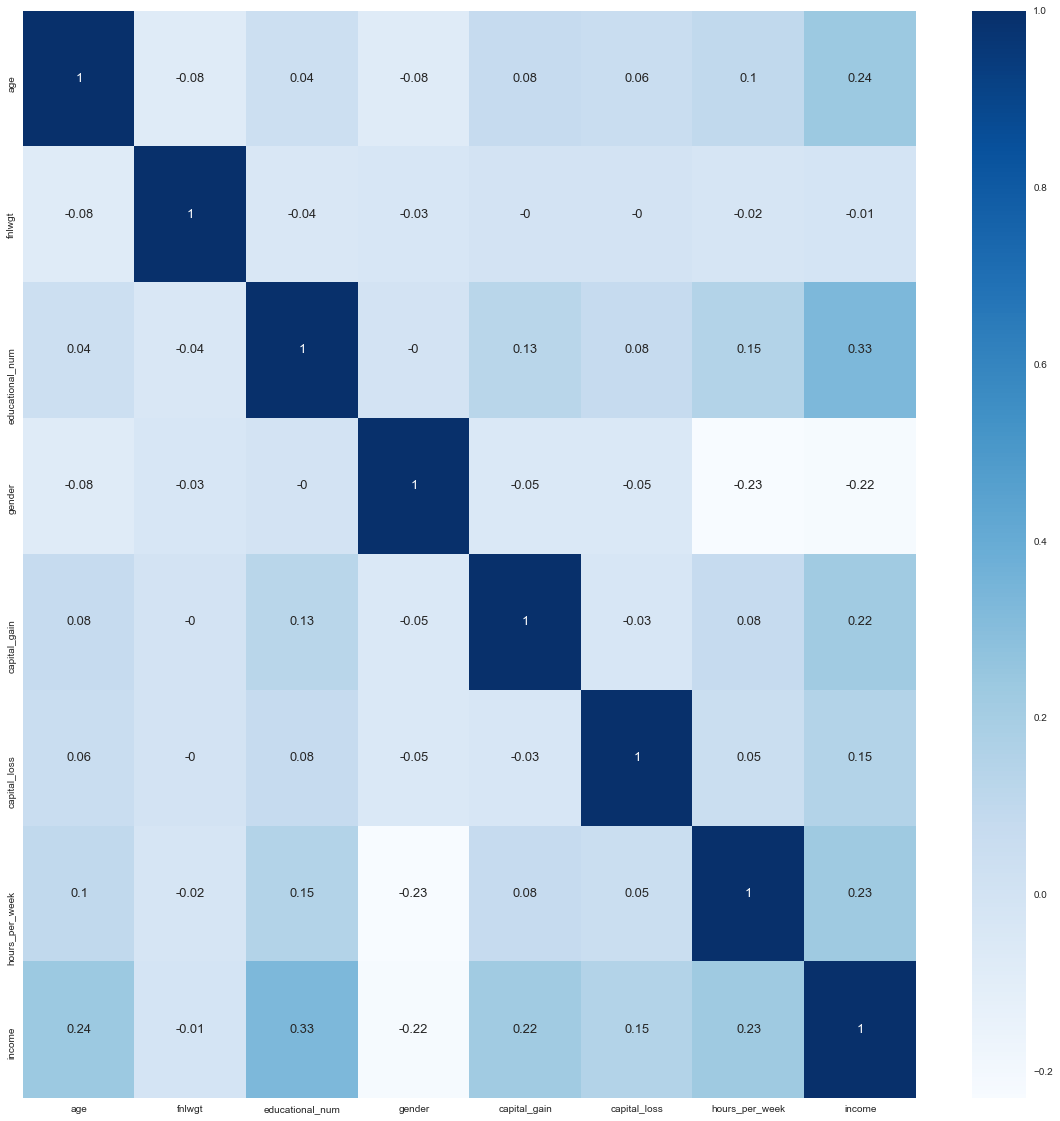

In [14]:
correlacion(df, 'income', .4)

Los resultados de la matriz de correlación pueden ser desalentadores, dado que no hay asociaciones fuertes entre las variables. Por defecto utilizamos la correlación de pearson, que no tiene un buen desempeño con variables que no sean estrictamente normales. Como ya se ha mencionado antes, ésto no es un impedimiento para seguir con la modelación ya que muchas relaciones no son estrictamente lineales

<a id='MD'>
 
##  4. Modelación descriptiva

[(back to top)](#contenidos)

- Modelación del problema.
- Interpretación de los principales regresores en cada problema.
- Definición de las estrategias de Modelación predictiva

La regresión logística permite generar estimaciones mediante el método de máxima verosimilitud.

Nuestro objetivo es desarrollar un modelo predictivo para la probabilidad de ocurrencia ($Pr(x) = Pr(Y = 1 | X = x)$).
$$ log \left( \frac{p(x)}{1 - p(x)} \right) = \beta_0 + \sum_{i=1}^n \beta_i x_i  $$

In [15]:
formula_1 = formula(df, 'income', ['income'])
print(f"El modelo es: {formula_1}\n")

El modelo es: income ~ age + workclass_recod + fnlwgt + educ_recod + educational_num + civstatus + collars + relationship + race + gender + capital_gain + capital_loss + hours_per_week + region



In [16]:
modelo_logit = smf.logit(formula_1, df).fit()
filtrado(modelo_logit,.05)   
concise_summary(df, modelo_logit,'income  ~',['income'], 0.05, print_fit = True, correccion = True )

Optimization terminated successfully.
         Current function value: 0.331731
         Iterations 11


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
Intercept,-6.299599e+00,5.015293e-01,-12.560780,3.468945e-36,-7.282579e+00,-5.316620
workclass_recod[T.federal-gov],4.468638e-01,7.499705e-02,5.958419,2.546899e-09,2.998723e-01,0.593855
workclass_recod[T.self-employed],-3.447946e-01,4.223579e-02,-8.163565,3.252786e-16,-4.275752e-01,-0.262014
workclass_recod[T.state-level-gov],-7.177075e-02,4.587666e-02,-1.564428,1.177170e-01,-1.616873e-01,0.018146
workclass_recod[T.unemployed],-1.104646e+00,8.000906e-01,-1.380651,1.673861e-01,-2.672795e+00,0.463503
educ_recod[T.elementary-school],1.426708e-01,2.372030e-01,0.601471,5.475262e-01,-3.222385e-01,0.607580
educ_recod[T.high-school],-6.634556e-02,4.673926e-02,-1.419482,1.557584e-01,-1.579528e-01,0.025262
educ_recod[T.preschool],-3.980688e+00,4.057498e+00,-0.981070,3.265584e-01,-1.193324e+01,3.971861
educ_recod[T.university],8.564106e-02,6.078194e-02,1.408989,1.588385e-01,-3.348935e-02,0.204771
civstatus[T.Never-married],-1.606020e+00,4.497807e-01,-3.570673,3.560649e-04,-2.487574e+00,-0.724466



Las variables a quitar son: ['educ_recod[T.elementary-school]', 'civstatus[T.married]', 'race[T.Other]', 'educ_recod[T.preschool]', 'workclass_recod[T.unemployed]', 'race[T.Black]', 'educ_recod[T.university]', 'educ_recod[T.high-school]', 'workclass_recod[T.state-level-gov]', 'region[T.asia]', 'region[T.europa]']

                                  ESTADÍSTICAS DE BONDAD DE AJUSTE



,Statistics,Value
2,BIC:,30367.4930
3,Log-Likelihood:,-15002.
4,LL-Null:,-25322.
5,LLR p-value:,0.0000
6,Scale:,1.0000
7,,


                                      ESTIMACIÓN PUNTUAL




,Coef.,Std.Err.,Puntaje_Z
Intercept,-6.30,0.50,-12.60
workclass_recod[T.federal-gov],0.45,0.07,6.43
workclass_recod[T.self-employed],-0.34,0.04,-8.50
workclass_recod[T.state-level-gov],-0.07,0.05,-1.40
workclass_recod[T.unemployed],-1.10,0.80,-1.38
educ_recod[T.elementary-school],0.14,0.24,0.58
educ_recod[T.high-school],-0.07,0.05,-1.40
educ_recod[T.preschool],-3.98,4.06,-0.98
educ_recod[T.university],0.09,0.06,1.50
civstatus[T.Never-married],-1.61,0.45,-3.58


 

                                  VARIABLES NO SIGNIFICATIVAS


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
educ_recod[T.elementary-school],0.142671,0.237203,0.601471,0.547526,-0.322239,0.607580
civstatus[T.married],-0.316591,0.429075,-0.737845,0.460609,-1.157563,0.524381
race[T.Other],0.220440,0.272396,0.809263,0.418364,-0.313446,0.754325
educ_recod[T.preschool],-3.980688,4.057498,-0.981070,0.326558,-11.933238,3.971861
workclass_recod[T.unemployed],-1.104646,0.800091,-1.380651,0.167386,-2.672795,0.463503
race[T.Black],0.264345,0.189108,1.397851,0.162158,-0.106300,0.634990
educ_recod[T.university],0.085641,0.060782,1.408989,0.158839,-0.033489,0.204771
educ_recod[T.high-school],-0.066346,0.046739,-1.419482,0.155758,-0.157953,0.025262
workclass_recod[T.state-level-gov],-0.071771,0.045877,-1.564428,0.117717,-0.161687,0.018146
region[T.asia],-0.267207,0.144762,-1.845840,0.064915,-0.550935,0.016521



Variables a excluir:  ['educ_recod[T.elementary-school]', 'civstatus[T.married]', 'race[T.Other]', 'educ_recod[T.preschool]', 'workclass_recod[T.unemployed]', 'race[T.Black]', 'educ_recod[T.university]', 'educ_recod[T.high-school]', 'workclass_recod[T.state-level-gov]', 'region[T.asia]', 'region[T.europa]']




In [17]:
formula_2 = formula(df, 'income', ['income','workclass_recod','educ_recod','civstatus','race','region'])
print(f"El modelo es: {formula_2}\n")

El modelo es: income ~ age + fnlwgt + educational_num + collars + relationship + gender + capital_gain + capital_loss + hours_per_week



In [18]:
modelo_logit2 = smf.logit(formula_2, df).fit()
filtrado(modelo_logit2,.05)   
modelo_logit_depurado = concise_summary(df, modelo_logit2,'income  ~',['income','workclass_recod','educ_recod','civstatus','race','region'], 0.05, print_fit = True, correccion = True )
modelo_logit_depurado

Optimization terminated successfully.
         Current function value: 0.334583
         Iterations 9


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
Intercept,-6.356151e+00,1.192010e-01,-53.322959,0.000000e+00,-6.589781e+00,-6.122522e+00
collars[T.other],-7.478802e-01,8.660030e-02,-8.636000,5.821559e-18,-9.176137e-01,-5.781467e-01
collars[T.white-collar],6.145608e-01,3.481990e-02,17.649702,1.022939e-69,5.463151e-01,6.828066e-01
relationship[T.Not-in-family],-1.971508e+00,4.706842e-02,-41.886009,0.000000e+00,-2.063761e+00,-1.879256e+00
relationship[T.Other-relative],-2.228128e+00,1.651355e-01,-13.492722,1.726083e-41,-2.551787e+00,-1.904468e+00
relationship[T.Own-child],-3.061663e+00,1.132466e-01,-27.035366,5.676822e-161,-3.283622e+00,-2.839704e+00
relationship[T.Unmarried],-2.054339e+00,8.231100e-02,-24.958260,1.737071e-137,-2.215666e+00,-1.893013e+00
relationship[T.Wife],1.012282e+00,8.314221e-02,12.175313,4.207787e-34,8.493267e-01,1.175238e+00
age,2.615434e-02,1.266893e-03,20.644477,1.094395e-94,2.367128e-02,2.863741e-02
fnlwgt,7.015687e-07,1.376664e-07,5.096150,3.466306e-07,4.317475e-07,9.713899e-07



Las variables a quitar son: []

                                  ESTADÍSTICAS DE BONDAD DE AJUSTE



,Statistics,Value
2,BIC:,30421.8564
3,Log-Likelihood:,-15131.
4,LL-Null:,-25322.
5,LLR p-value:,0.0000
6,Scale:,1.0000
7,,


                                      ESTIMACIÓN PUNTUAL




,Coef.,Std.Err.,Puntaje_Z
Intercept,-6.36,0.12,-53.00
collars[T.other],-0.75,0.09,-8.33
collars[T.white-collar],0.61,0.03,20.33
relationship[T.Not-in-family],-1.97,0.05,-39.40
relationship[T.Other-relative],-2.23,0.17,-13.12
relationship[T.Own-child],-3.06,0.11,-27.82
relationship[T.Unmarried],-2.05,0.08,-25.62
relationship[T.Wife],1.01,0.08,12.62
age,0.03,0.00,inf
fnlwgt,0.00,0.00,NaN


 

                                  VARIABLES NO SIGNIFICATIVAS


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]



Variables a excluir:  []




<a id='MP'>
 
##  5. Modelación predictiva

[(back to top)](#contenidos)
    
- Preparación del ambiente de trabajo (imports, separación de muestras) para implementar modelos de predicción.
- Implementación de por lo menos tres modelos predictivos. 
- Reporte del mejor modelo predictivo en base a los resultados

In [19]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns=['income','workclass_recod','educ_recod','civstatus','race','relationship','region','collars']), 
                                                    df['income'], 
                                                    test_size=.33, 
                                                    random_state=2054)

In [20]:
x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)

In [21]:
model_ajust = LogisticRegression().fit(x_train, y_train)
model_ajust.coef_

array([[ 0.57776937,  0.04844156,  0.84452426, -0.56570265,  2.27095807,
         0.25866317,  0.37601508]])

In [22]:
y_hat = model_ajust.predict(x_test)
y_hat[:15]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

Una de las maneras más comunes de evaluar desempeño es el cruzar la información de la predicción con las etiquetas reales de nuestra muestra de validación. Esto se conoce como matriz de confusión, y permite observar la cantidad de observaciones predichas de forma correcta.

Sklearn tiene el método confusion_matrix en su módulo metrics que permite desarrollar este cruce de información. Este procedimiento se puede realizar de forma alternativa con pd.crosstab(). El método pide como argumentos el vector objetivo de prueba (y_test) y el vector de etiquetas predichas (y_hat).</div>

In [23]:
modelo_confusion = confusion_matrix(y_test, y_hat)
modelo_confusion

array([[10568,   636],
       [ 2081,  1639]], dtype=int64)

In [24]:
modelo_conf_pd = pd.crosstab(y_test, y_hat)
modelo_conf_pd

col_0,0,1
income,,
0,10568,636
1,2081,1639


La tabla resultante permite observar las categorías predichas con las observadas. La diagonal principal reporta los casos exitosamente predichos.

In [25]:
'Exactitud:{}'.format(accuracy_score(y_test,y_hat))

'Exactitud:0.8179442508710801'

In [26]:
'Precisión:{}'.format(precision_score(y_test,y_hat))

'Precisión:0.7204395604395605'

In [27]:
'Recall:{}'.format(recall_score(y_test,y_hat))

'Recall:0.4405913978494624'

In [28]:
print('F1: \n {}'.format(classification_report(y_test,y_hat) ) )

F1: 
               precision    recall  f1-score   support

           0       0.84      0.94      0.89     11204
           1       0.72      0.44      0.55      3720

    accuracy                           0.82     14924
   macro avg       0.78      0.69      0.72     14924
weighted avg       0.81      0.82      0.80     14924



In [29]:
y_hat_prob = model_ajust.predict_proba(x_test)[:,1]

In [30]:
false_positive, true_positive, threshold = roc_curve(y_test, y_hat_prob)

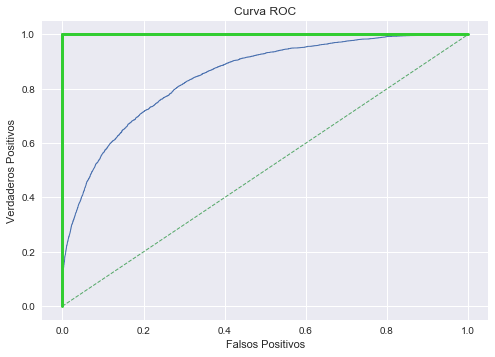

In [31]:
plt.title('Curva ROC')
plt.plot(false_positive, true_positive, lw=1)
plt.plot([0, 1], ls="--", lw=1)
plt.plot([0, 0], [1, 0] , c='limegreen', lw=3), plt.plot([1, 1] , c='limegreen', lw=3)
plt.ylabel('Verdaderos Positivos')
plt.xlabel('Falsos Positivos');

In [32]:
roc_auc_score(y_test, y_hat)

0.6919129784677516

Con un valor de 0.69, nuestro modelo tiene un desempeño 31% superior a un mecanismo de clasificación aleatoria. Es aceptable, pero se puede mejorar.

<a id='base'>
 
##  6. Variables contenidas en la base de datos

[(back to top)](#contenidos)

Las variables que componen la base se detallan a continuación:
#### Binarias
- sex : Sexo del encuestado.
- income : <=50K Si el individuo percibe ingresos inferiores a 50.000 dólares anuales, >50K si el individuo percibe ingresos superiores a 50.000 dólares anuales. Este es su vector objetivo


#### Numéricas
- age : Edad del individuo.
- capital-gains : Ingresos generados por inversiones fuera del trabajo asalariado = Ingresos generados por inversiones fuera del trabajo asalariado. 
- capital-losses : Pérdidas generadas por inversiones fuera del trabajo asalariado.
- fnlwgt : Ponderador muestral. 
- hours-per-week : Cantidad de horas trabajadas por semana.

#### Nominal
- workclass : Naturaleza de la organización que emplea al individuo.
- education : Nivel educacional del individuo: Bachelors (Licenciado), Some-college (Superior incompleta), 11th (3ro medio), HS-grad (Secundaria completa), Prof-school (Escuela profesional), Assoc-acdm (Técnico superior administrativo) , Assoc-voc (Técnico superior vocacional), 9th (1ro medio), 7th-8th (7mo-8vo), 12th (4to medio), Masters (Maestría de postgrado), 1st-4th (1ro-4to básico), 10th(2do medio), Doctorate (Doctorado), 5th-6th (5to-6to), Preschool (Preescolar).
- marital-status : Estado civil del individuo: Married-civ-spouse (Casado/a régimen civil), Divorced (Divorciado/a), Never-married (Soltero/a), Separated (Separado/a), Widowed (Viudo/a), Married-spouse-absent (Casado con esposo/a ausente), Married-AF-spouse (Casado/a régimen castrense).
- occupation : Ocupación del individuo: Tech-support (Soporte técnico), Craft-repair (Reparaciones), Other-service (Otros servicios), Sales (Ventas), Exec-managerial (Ejecutivo administrativos), Prof-specialty (Profesores), Handlers-cleaners (Aseo y ornato), Machine-opinspct (Inspectores de maquinarias), Adm-clerical (Administrativos servicio al cliente), Farmingfishing (Pesca-ganadería), Transport-moving (Transporte), Priv-house-serv (Asesor del hogar), Protective-serv (servicios de seguridad), Armed-Forces (Fuerzas armadas).
- relationship : Relación respecto a su familia Wife(Esposa), Own-child (hijo único), Husband (Esposo), Not-in-family (No pertenece a la familia), Other-relative (Familiar de otro tipo), Unmarried (Soltero).
- race : Raza del encuestado White(Blanco caucásico), Asian-Pac-Islander (Isleño del Asia Pacífico), Amer-Indian-Eskimo (Pertenenciente a pueblos originarios), Other (Otro grupo), Black (Afroamericano).
- native-country : País de origen. United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, HolandNetherlands.